---
title: "Лабораторна робота 1. Побудова простого лінійного бінарного класифікатора"
description:
  __Розпізнавання образів та комп'ютерний зір__
author: "&copy; [<span style='color: blue;'>Tereshchenko Daniil </span>](https://www.linkedin.com/in/daniil-tereshchenko/), 2025"
date: "03.05.2025"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

**Мета**: реалізузвати найпростійший бінарний класифікатор засобами мови Python

### Постановка задачі бінарної класифікації

Розглянемо для простоти задачу двокласової класифікації.

![*Рис. 4.5 До пояснення суті задачі двукласової класифікації у просторі двох ознак*](image 4/ris5.png)

Маємо набір вхідних векторів, кожен з яких буде має два вхідних значення, а вихідна (цільова) змінна приймати два дискретних значення:

$$
x_i=[x_{i1}, x_{i2}]^T, i=1, 2, ...
$$
$$
\begin{cases}
+1, & \text{якщо $x \in С_1$,} \\
-1, & \text{якщо $x \in С_2$.}
\end{cases}
$$



Уточнемо: якщо ми попадаємо у клас $C_1$, то мітка буде $+1$, інакше -- $C_2$. Задача полягає в знаходженні рівняння прямої лінії $a(x)=kx+b$, яка розділяє два класи.

Так виглядає постановка задачі бінарної класифікації.

### Розв'язання простої задачі бінарної класифікації 

Ідея розв'язання задачі розділення лінійно розділимих образів дуже проста: ми будемо для кожного вектора вхідних даних обчислювати скалярний добуток. Якщо його значення буде > нуля, значить точка знаходиться над розділяючою поверхнею, якщо менше -- точки знаходиться під нею (рис. 1.2).

![*Рис. 1.2*](image 4/ris8.png)

Для цього введемо знакову функцію


$$sign(x)=
\begin{cases}
-1, & \text{якщо $x<0$,} \\
+1, & \text{якщо $x>0$.}
\end{cases}
$$


Тоді

$a(x, \omega) = sign(\langle \omega, x \rangle).$

Якщо $\langle \omega, x \rangle) = 0$ -- відмова у класифікації.

Ключове питання: як шукати параметри розділяючої гіперплощини $\omega = [\omega_0, \omega_1, \omega_2]^T$?

Унашому випадку це пряма лінія $\omega = [\omega_0, \omega_1]^T$.

Розглянемо задачу класифікації гусениць і божих корівок:

**Таблиця 1.1:** *Дані про жуків*

| № | Ширина | Довжина | Жук |
|------|------|------|------|
| 1    | 10    | 50    |гусениця |
| 2    | 20    | 30   | божа корівка|
| 3    | 25   | 30  | божа корівка|
| 4    | 20   | 60   | гусениця|
| 5    | 15   | 70    | гусениця|
| 6    | 40   | 40   | божа корівка|
| 7    | 30   | 45   | божа корівка|
| 8    | 20   | 45   | гусениця|
| 9    | 40   | 30   | божа корівка|
| 10    | 7    | 35    | гусениця|


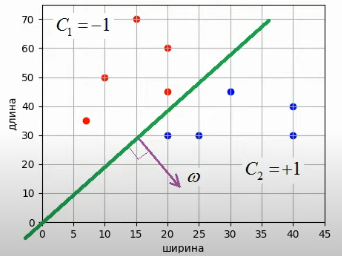

У нашому випадку чітко видно, що дані утворюють лінійно роздільні класи і роздільну лінію можна провести через початок координат.  Її рівняння можна записати просто:

$\omega_1 x_1 + \omega_2 x_2 = 0$, 

або 

$x_2 = - \frac{\omega_1}{\omega_2} x_1.$

Якщо для простоти взяти $\omega_2 = -1$, то

$x_2 = \omega_1 x_1.$

і задача зводиться до пошуку єдиного параметра

$\omega = [\omega_1, -1]^T.$

Таку задачу розв'язував свого часу Френк Розенблатт (1928-1971), який увів критерій якості для розділяючої лінії як кількість випадків неправильної класифікації:

$Q(a, X^l) = \sum_{i=1}^l \Big[a(x_i \ne y_i)\Big]$,

де вираз $\Big[a(x_i \ne y_i)\Big]$ називається *нотацією Айзерсона* і повертає $1$ або $0$.

З урахуванням того, що $y \in \{-1, +1\}$, функціонал якості можна переписати як

$Q(a, X^l) = \sum_{i=1}^l \Big[ a(x_i) \cdot y_i < 0\Big]$, тобто, якщо класифікація виконана неправильно, то маємо $y_i \cdot a(x_i)  < 0$.

Вираз $M_i = a(x_i) \cdot y_i$ називають *відступом (margin)* і часто використовується на практиці.

Важливо зазначити, що з урахуванням того, що $a(x) = \langle \omega, x \rangle$, то відступ ще й показує відстань від розділюячої гіперплощини.

Таким чином задача зводиться до пошуку оцінки параметра $\mathbf\omega$, яка мінімізує функціонал

$Q(a, X^l) = \sum_{i=1}^l \Big[M_l < 0\Big] \rightarrow min$

Однак, цей функціонал представляє собою кусочно-неперервну функцію, яка не дифернціюється, тому застосувати градієнтний метод для його мінімізації не є можливим. Пізніше ми покажемо, як обійти цю проблему. Водночас, можна запропонувати суто алгоритмічний підхід для розв'язання задачі, який свого часу запропонував Ф. Розенблатт.

* **Вхід:** вибірка $X^l$, шаг навчання $\eta$, максимальна кількість ітерацій $N$
* **Вихід:** вектор ваг $\omega = [\omega_1, \omega_2]^T$
1. ініціалізація $\omega = [0, =1]^T$
2. повторювати $N$ разів
3. \|_по черзі вибирати $x_i, y_i$ з навчальної вибірки $X^l$
4. ||___якщо $M_i = sign(\langle \omega, x_i \rangle) \cdot y_i < 0.$
5. ||_______корегувати вагу: $\omega_1 = \omega_1 + \eta \cdot y_i$
6. \|_обчислюємо показник якості $Q(a, X^l) = \sum_{l=1}^l \Big[M_l < 0\Big]$
7. \|_якщо $Q(a, X^l) = 0$, то цикл припиняється (розв'язок знайдено)

Нижче наведено реалізацію цього алгоритма на Python.

[np.float64(0.7999999999999999), -1]


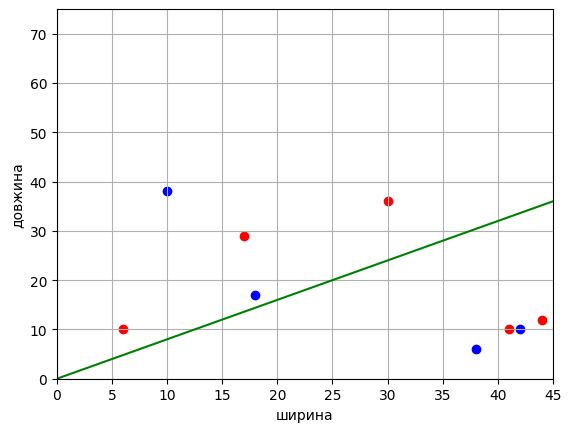

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
# y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])


x_train = np.array([[17, 29], [44, 12], [47,  7], [18, 17], [30, 36], [6, 10], [38, 6], [10, 38], [41, 10], [42, 10]])
y_train = np.array([ 1, 1,  1, -1,  1,  1, -1, -1,  1, -1])

n_train = len(x_train)                          # розмір навчальної вибірки
w = [0, -1]                                     # початкове значення вектора w
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # правило класифікації
N = 50                                          # максимальна кількість ітерацій
L = 0.1                                         # крок зміни ваги
e = 0.1                                         # невелике додаток до w0, щоб забезпечити зазор між лінією розділення та областю

last_error_index = -1                           # індекс останньої помилкової спостереження

for n in range(N):
    for i in range(n_train):                # ітерація по спостереженням
        if y_train[i]*a(x_train[i]) < 0:    # якщо помилка класифікації,
            w[0] = w[0] + L * y_train[i]    # то коригування ваги w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показник якості класифікації (кількість помилок)
        break       # зупинка, якщо всі класифікуються правильно

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

line_x = list(range(max(x_train[:, 0])))    # створення графіка роздільної лінії
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для 1-го
x_1 = x_train[y_train == -1]                # і 2-го класів

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()


In [22]:
import json
import numpy as np

data_variant2 = {
    "x_train_1": [
        [17, 29],
        [44, 12],
        [47, 7],
        [18, 17],
        [30, 36],
        [6, 10],
        [38, 6],
        [10, 38],
        [41, 10],
        [42, 10]
    ],
    "y_train_1": [1, 1, 1, -1, 1, 1, -1, -1, 1, -1]}

with open("data_variant2.json", "w", encoding="utf-8") as f:
    json.dump(data_variant2, f, ensure_ascii=False, indent=4)

with open("data_variant2.json", "r", encoding="utf-8") as f:
    imported_data = json.load(f)

x_train = np.array(imported_data["x_train_1"])
y_train_orig = np.array(imported_data["y_train_1"])
y_train = np.array([1 if i == 1 else 0 for i in y_train_orig])

x_train, y_train

(array([[17, 29],
        [44, 12],
        [47,  7],
        [18, 17],
        [30, 36],
        [ 6, 10],
        [38,  6],
        [10, 38],
        [41, 10],
        [42, 10]]),
 array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0]))

Матриця X (рядки = [x1, x2, 1]):
 [[17. 29.  1.]
 [44. 12.  1.]
 [47.  7.  1.]
 [18. 17.  1.]
 [30. 36.  1.]
 [ 6. 10.  1.]
 [38.  6.  1.]
 [10. 38.  1.]
 [41. 10.  1.]
 [42. 10.  1.]]

Вектор y:
 [[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]

--- Результат МНК ---
Обчислений вектор ваг ω (стовпець [ω1, ω2, ω0]ᵀ):
[[0.00568475]
 [0.00305225]
 [0.38002239]]
  ω1=0.0057, ω2=0.0031, ω0=0.3800

--- Класифікація ---
Передбачені класи:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Справжні класи:
[1 1 1 0 1 1 0 0 1 0]

Точність на тренувальних даних (МНК): 60.00%


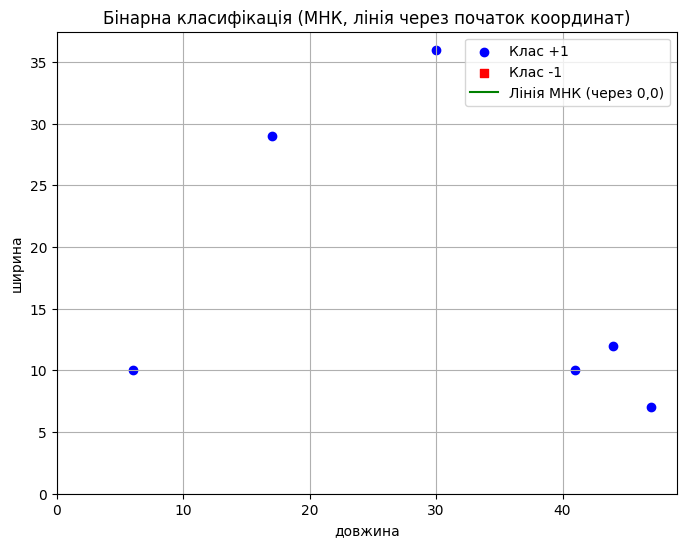

In [68]:
import json
import numpy as np
import matplotlib.pyplot as plt


# TEST - щоб перевірити правильність реалізації алгоритму на прикладі з методички (Рис. 4.9)
# data_variant2 = {
#     "x_train_1": [
#         [10, 50], [20, 30], [25, 30], [20, 60], [15, 70],
#         [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]
#     ],
#     "y_train_1": [1, -1, -1, 1, 1, -1, -1, 1, -1, 1]
# }

x_orig =  x_train # np.array(data_variant2["x_train_1"])
y_labels = y_train # np.array(data_variant2["y_train_1"])


X = np.hstack((x_orig, np.ones((x_orig.shape[0], 1))))
y = y_labels.reshape(-1, 1)

print("Матриця X (рядки = [x1, x2, 1]):\n", X)
print("\nВектор y:\n", y)


try:
    # Формула: ω = (XᵀX)⁻¹(Xᵀy)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    w1, w2, w0 = w.flatten()

    print(f"\n--- Результат МНК ---")
    print(f"Обчислений вектор ваг ω (стовпець [ω1, ω2, ω0]ᵀ):\n{w}")
    print(f"  ω1={w1:.4f}, ω2={w2:.4f}, ω0={w0:.4f}")

    predictions = np.sign(X @ w)
    accuracy = np.mean(predictions == y) * 100

    print(f"\n--- Класифікація ---")
    print(f"Передбачені класи:\n{predictions.flatten()}")
    print(f"Справжні класи:\n{y_labels}")
    print(f"\nТочність на тренувальних даних (МНК): {accuracy:.2f}%")



    plt.figure(figsize=(8, 6)) # Зробимо графік трохи більшим
    plt.scatter(x_orig[y_labels == 1, 0], x_orig[y_labels == 1, 1], color='blue', marker='o', label='Клас +1')
    plt.scatter(x_orig[y_labels == -1, 0], x_orig[y_labels == -1, 1], color='red', marker='s', label='Клас -1')


    xlim = plt.xlim()
    ylim = plt.ylim()
    x_min_max = np.array([min(0, xlim[0]), max(0, xlim[1])])

    # Побудова лінії w1*x1 + w2*x2 = 0
    if abs(w2) > 1e-6: # Якщо лінія не вертикальна (w2 != 0)
        # x2 = (-w1 * x1) / w2
        x2_line = (-w1 * x_min_max) / w2
        plt.plot(x_min_max, x2_line, 'g-', label=f'Лінія МНК (через 0,0)')
    elif abs(w1) > 1e-6: # Якщо лінія вертикальна (w2=0, w1!=0)
        # w1*x1 = 0 => x1 = 0
        plt.axvline(x=0, color='g', linestyle='-', label=f'Лінія МНК (через 0,0)')
    # else: # Якщо w1=0 та w2=0, лінія не визначена (малоймовірно)
        # pass

    plt.xlabel('довжина')
    plt.ylabel('ширина')
    plt.title('Бінарна класифікація (МНК, лінія через початок координат)')
    plt.legend()
    plt.grid(True)
    # Встановимо межі осей, щоб початок координат був видимий, якщо потрібно
    plt.xlim(min(0, xlim[0]), max(0, xlim[1]))
    plt.ylim(min(0, ylim[0]), max(0, ylim[1]))
    plt.axhline(0, color='black', linewidth=0.5) # Додамо вісь X
    plt.axvline(0, color='black', linewidth=0.5) # Додамо вісь Y
    plt.show()

except np.linalg.LinAlgError:
    print("\nПомилка: Матриця XᵀX є сингулярною і не може бути обернена.")

## Завдання для самостійної роботи 

1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
1. Побудувати бінарний класифікатор і вивести результати бінарної класифікації на графіку.
1. Дати відповіді на контрольні запитання.
1. Відправити результати роботи у файлі lab_1_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Які основні принципи лежать в основі розпізнавання образів у контексті машинного навчання?
    - Спочатку виділяємо важливі ознаки об'єкта, потім будуємо модель, яка на основі цих ознак зможе класифікувати одні об'єкти від інших. 
1. Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів?
    - Це набір даних, де для кожного об'єкта вже відомо, до якого класу він належить. Саме на цих прикладах модель вчиться знаходити закономірності щоб потім розпізнавати нові об'єкти.
1. Зформулювати постановку  задачі бінарної класифікації.
    - Треба розробити правило або функцію, яка для будь-якого нового об'єкта, описаного набором ознак, зможе сказати, до якого з двох можливих класів він належить.
1. Що таке рівняння гіперплощини і як воно використовується для розв'язання задачі бінарної класифікації?
   - Це лінійне рівняння типу w1*x1 + w2*x2 + ... + wn*xn + w0 = 0, де x – це ознаки об'єкта, а w – це ваги, які підбирає модель під час навчання. В бінарній класифікації гіперплощина (у 2D це просто лінія, у 3D – площина) використовується як межа, що розділяє простір ознак на дві частини, кожна з яких відповідає одному з класів. Об'єкт потрапляє в один клас, якщо він по один бік гіперплощини, і в інший – якщо по інший.
1. Наведіть кроки для розв'язання простої задачі бінарної класифікації за допомогою машинного навчання.
    - Зібрати дані (навчальну вибірку) з ознаками та мітками класів (+1/-1).
    - Підготувати дані (можливо, почистити, нормалізувати).
    - Обрати модель.
    - "Навчити" модель на навчальній вибірці.
    - Оцінити якість моделі.
    - Використовувати навчену модель для класифікації нових об'єктів.

## References

1. [Машинное обучение. Вводная лекция. К.В. Воронцов, Школа анализа данных, Яндекс.](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=2)
1. [#1. Что такое машинное обучение? Обучающая выборка и признаковое пространство | Машинное обучение](https://www.youtube.com/watch?v=Md8RW6tKCNg)
1. [NumPy](https://numpy.org)
1. [NumPy](https://wesmckinney.com/book/preliminaries)